# 실습 전 데이터

In [2]:
import pandas as pd

df = pd.DataFrame( {
    'A' : ['a','b','c','a','b'],
    'B' : [1, 2, 3, 1, 0]
})

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


## label_encoder

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])
# A 컬럼을 le에 학습시킨 것

LabelEncoder()

대상이 되는 문자로 된 데이터

In [4]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

fit 시킨 데이터를 적용하는 것이 transform이라고 할 수 있다.

In [5]:
df['le_A'] = le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [6]:
le.transform(['a','b'])

array([0, 1])

fit 과 transform을 한번에 적용

In [7]:
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

역변환하고 싶다면

In [8]:
le.inverse_transform([1,2,2,2])

array(['b', 'c', 'c', 'c'], dtype=object)

## min-max scaling

### 데이터 준비

In [10]:
df = pd.DataFrame( {
    'A' : [10,20,-10,0,25],
    'B' : [1,2,3,1,0]
})

df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [15]:
mms.data_max_, mms.data_min_
# A_max, B_max / A_min, B_min

(array([25.,  3.]), array([-10.,   0.]))

In [14]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

transform 시키면 최댓값이 1이되고, 최솟값이 0이된다.

역변환

In [16]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

한번에

In [17]:
mms.fit_transform(df)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

## Standart Scaler

In [19]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

평균과 표준편차

In [22]:
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [25]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

한번에

In [26]:
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

역변환

In [27]:
ss.inverse_transform(df_ss)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

## Robust Scaler

데이터준비

In [28]:
df = pd.DataFrame({
    'A' : [-0.1,0.,0.1,0.2,0.3,0.4,1.0,1.1,5]
})

MinMaxScaler, StandartScaler, RobustScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [30]:
df_scaler = df.copy()

In [31]:
df_scaler['MinMax'] = mm.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

In [32]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


box_plot

<Axes: >

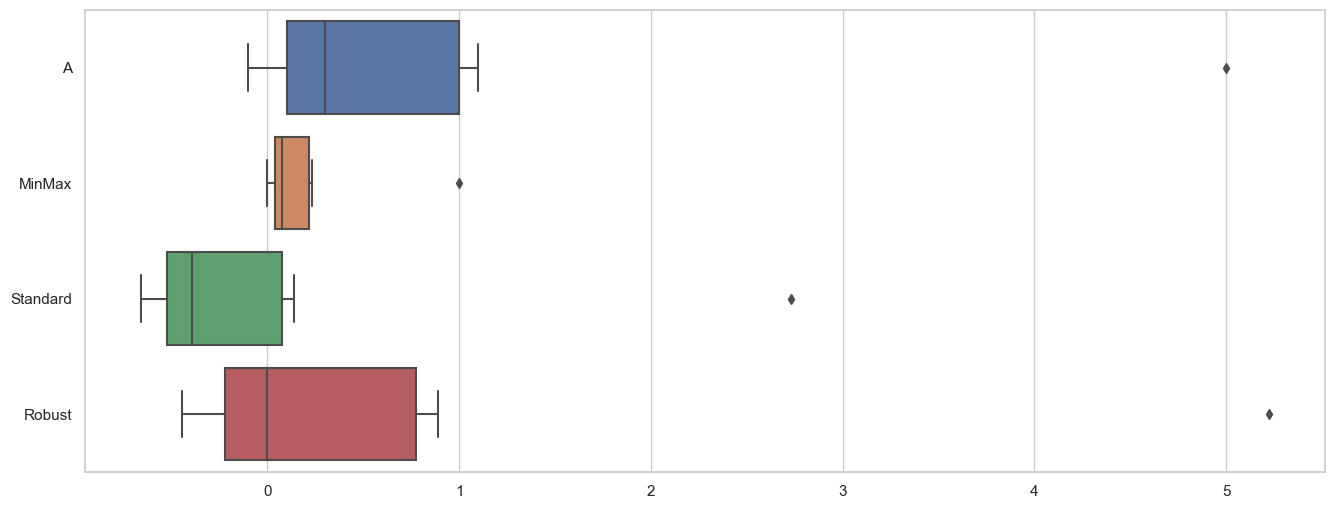

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16,6))
sns.boxplot(data=df_scaler, orient='h')